## S13 T02 Base de dades MySQL
### Crear base de dades amb MySQL.
#### Eloi Canals

Nivell 1 - Exercici 1
Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector
from mysql.connector import Error

from random import *

In [53]:
# Obrim conexió a la BBDD en local
db = mysql.connector.connect(
     host="localhost",
     user="eloi",
     password="eloi",
    )

print(db)

In [54]:
# Eliminem la BBDD creada desde el Workbench per crearla de nou
myDDBB = db.cursor()
myDDBB.execute("DROP DATABASE IF EXISTS myDB2")
myDDBB.execute("CREATE DATABASE myDB2")
myDDBB.execute("SHOW DATABASES")
for x in myDDBB:
    print(x)

('information_schema',)
('mydb',)
('myDB2',)
('mysql',)
('performance_schema',)
('sys',)


In [55]:
myDDBB = db.cursor()
#
myDDBB.execute("USE myDB2")

In [56]:
# Creació de schema i taules
myDDBB.execute("CREATE SCHEMA IF NOT EXISTS `mydb2` DEFAULT CHARACTER SET utf8")

In [57]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Client` (
  `client_pk` INT NOT NULL AUTO_INCREMENT,
  `Nom` VARCHAR(45) NULL,
  `Cognoms` VARCHAR(45) NULL,
  `DNI` VARCHAR(45) NULL,
  `Mitja_pagament` VARCHAR(45) NULL,
  PRIMARY KEY (`client_pk`),
  UNIQUE INDEX `client_pk_UNIQUE` (`client_pk` ASC) VISIBLE)""")

In [58]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Establiment` (
  `establiment_pk` INT NOT NULL AUTO_INCREMENT,
  `nom` VARCHAR(45) NOT NULL,
  `localitzacio` VARCHAR(45) NULL,
  `superficie` VARCHAR(45) NULL,
  PRIMARY KEY (`establiment_pk`),
  INDEX `establiment_pk_UNIQUE` (`establiment_pk` ASC) VISIBLE)
ENGINE = InnoDB;""")

In [59]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Treballador` (
  `treballador_pk` INT NOT NULL AUTO_INCREMENT,
  `Nom` VARCHAR(45) NULL,
  `Cognoms` VARCHAR(45) NULL,
  `establiment_fk` INT NULL,
  PRIMARY KEY (`treballador_pk`),
  UNIQUE INDEX `treballador_pk_UNIQUE` (`treballador_pk` ASC) VISIBLE,
  INDEX `establiment_fk_2_idx` (`establiment_fk` ASC) VISIBLE,
  CONSTRAINT `establiment_fk`
    FOREIGN KEY (`establiment_fk`)
    REFERENCES `mydb2`.`Establiment` (`establiment_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)""")

In [60]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Producte` (
  `product_pk` INT NOT NULL AUTO_INCREMENT,
  `tipus_fk` INT NULL,
  `descripcio` VARCHAR(45) NULL,
  `Preu` VARCHAR(45) NULL,
  PRIMARY KEY (`product_pk`),
  UNIQUE INDEX `product_pk_UNIQUE` (`product_pk` ASC) VISIBLE)""")

In [61]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Tipus_Producte` (
  `tipus_pk` INT NOT NULL AUTO_INCREMENT,
  `desc_tipus` VARCHAR(45) NULL,
  PRIMARY KEY (`tipus_pk`),
  UNIQUE INDEX `tipus_pk_UNIQUE` (`tipus_pk` ASC) VISIBLE,
  CONSTRAINT `tipus_fk`
    FOREIGN KEY (`tipus_pk`)
    REFERENCES `mydb2`.`Producte` (`product_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)""")

In [62]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Transaccio` (
  `client_fk` INT NOT NULL,
  `establiment_fk` INT NOT NULL,
  `treballador_fk` INT NOT NULL,
  `trans_pk` INT NOT NULL AUTO_INCREMENT,
  `total_trans` INT NULL,
  UNIQUE INDEX `Trans_pk_UNIQUE` (`client_fk` ASC, `establiment_fk` ASC, `treballador_fk` ASC) VISIBLE,
  INDEX `client_fk_idx` (`client_fk` ASC) VISIBLE,
  INDEX `establiment_fk_idx` (`establiment_fk` ASC) VISIBLE,
  INDEX `treballador_fk_idx` (`treballador_fk` ASC) VISIBLE,
  PRIMARY KEY (`trans_pk`),
  CONSTRAINT `client_fk`
    FOREIGN KEY (`client_fk`)
    REFERENCES `mydb2`.`Client` (`client_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `establiment_fk_2`
    FOREIGN KEY (`establiment_fk`)
    REFERENCES `mydb2`.`Establiment` (`establiment_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `treballador_fk`
    FOREIGN KEY (`treballador_fk`)
    REFERENCES `mydb2`.`Treballador` (`treballador_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)""")

In [63]:
myDDBB.execute("""CREATE TABLE IF NOT EXISTS `mydb2`.`Transaccio_Detail` (
  `transdet_pk` INT NOT NULL AUTO_INCREMENT,
  `trans_fk` INT NOT NULL,
  `product_fk` INT NOT NULL,
  `Qty` INT NULL,
  `total_detail` VARCHAR(45) NULL,
  PRIMARY KEY (`transdet_pk`, `trans_fk`, `product_fk`),
  UNIQUE INDEX `transdet_pk_UNIQUE` (`transdet_pk` ASC) VISIBLE,
  INDEX `product_fk_idx` (`product_fk` ASC) VISIBLE,
  INDEX `trans_fk_idx` (`trans_fk` ASC) VISIBLE,
  CONSTRAINT `product_fk`
    FOREIGN KEY (`product_fk`)
    REFERENCES `mydb2`.`Producte` (`product_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `trans_fk`
    FOREIGN KEY (`trans_fk`)
    REFERENCES `mydb2`.`Transaccio` (`trans_pk`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)""")

In [64]:
myDDBB.execute("SHOW TABLES")
for i in myDDBB:
    print(i)

('Client',)
('Establiment',)
('Producte',)
('Tipus_Producte',)
('Transaccio',)
('Transaccio_Detail',)
('Treballador',)


In [65]:
# ALTER TABLE `myDB2`.`Transaccio` DROP INDEX `Trans_pk_UNIQUE`, ADD INDEX `Trans_pk_UNIQUE` (`client_fk`, `establiment_fk`, `treballador_fk`) USING BTREE;
myDDBB.execute("""ALTER TABLE `myDB2`.`Transaccio` DROP INDEX `Trans_pk_UNIQUE`, ADD INDEX `Trans_pk_UNIQUE` (`client_fk`, `establiment_fk`, `treballador_fk`) USING BTREE""")
db.commit()

In [66]:
# Omplim les taules de dades
import names
# Generate 10 random names for clients
clients = []
for i in range(10):
    clients.append([names.get_first_name(),names.get_last_name()])


clients

[['Stephanie', 'Hunter'],
 ['Chandra', 'Evans'],
 ['Tiffani', 'Davidson'],
 ['Ann', 'Roy'],
 ['Georgina', 'Blanks'],
 ['Mary', 'Thai'],
 ['Monica', 'Dalessandro'],
 ['William', 'Fry'],
 ['Buck', 'Guerrero'],
 ['Richard', 'Goode']]

In [67]:
clients[0][0]

'Stephanie'

In [68]:
# Basic CRUD operations: CREATE
sql_insert_clients = "INSERT INTO Client (Nom, Cognoms) VALUES (%s, %s)"
for i in range(0,9):
    myDDBB.execute(sql_insert_clients, clients[i])
db.commit()

print(myDDBB.rowcount, "record inserted.")

1 record inserted.


In [69]:
# Generate 10 random names for employees
treballadors = []
for i in range(10):
    treballadors.append([names.get_first_name(),names.get_last_name()])
treballadors

[['Stephen', 'Gonzales'],
 ['Charles', 'Bentley'],
 ['Leola', 'Hartwig'],
 ['Danny', 'York'],
 ['Kevin', 'Bosarge'],
 ['William', 'Jones'],
 ['Fred', 'Hanan'],
 ['Michael', 'Hegwood'],
 ['Jesus', 'Powell'],
 ['Ronald', 'Medlin']]

In [70]:
sql_insert_treballadors = "INSERT INTO Treballador (Nom, Cognoms) VALUES (%s, %s)"
for i in range(0,9):
    myDDBB.execute(sql_insert_treballadors, treballadors[i])
db.commit()

print(myDDBB.rowcount, "record inserted.")

1 record inserted.


In [71]:
# Rest of mandatory data
sql_insert_establiment = "INSERT INTO Establiment (nom, localitzacio, superficie) VALUES (%s, %s, %s)"
myDDBB.execute(sql_insert_establiment, ['Coffee Delight','Sunnyvale','400'])
db.commit()

In [72]:
sql_insert_prod = "INSERT INTO Producte (tipus_fk, descripcio,Preu) VALUES (%s, %s, %s)"
myDDBB.execute(sql_insert_prod, ['1','Cafe Sol',round(uniform(1.50,12.50),2)])
myDDBB.execute(sql_insert_prod, ['1','Capuccino',round(uniform(1.50,12.50),2)])
myDDBB.execute(sql_insert_prod, ['2','Choco Cookie',round(uniform(1.50,12.50),2)])
myDDBB.execute(sql_insert_prod, ['2','Vanilla Cookie',round(uniform(1.50,12.50),2)])
myDDBB.execute(sql_insert_prod, ['2','Choco Cookie',round(uniform(1.50,12.50),2)])
myDDBB.execute(sql_insert_prod, ['3','Veggie Sandwitch',round(uniform(1.50,12.50),2)])
myDDBB.execute(sql_insert_prod, ['3','Keto Sandwitch',round(uniform(1.50,12.50),2)])
db.commit()

In [73]:
sql_insert_tipus_prod = "INSERT INTO Tipus_Producte (desc_tipus) VALUES (%s)"
myDDBB.execute(sql_insert_tipus_prod, ['Coffee'])
myDDBB.execute(sql_insert_tipus_prod, ['Cookie'])
myDDBB.execute(sql_insert_tipus_prod, ['Sandwitch'])
db.commit()

In [74]:
# Basic CRUD operations: READ
sql_Select_all_prod = "SELECT * FROM Producte"
myDDBB.execute(sql_Select_all_prod)
myresult = myDDBB.fetchall()
for i in myresult:
    print(i)

(1, 1, 'Cafe Sol', '4.56')
(2, 1, 'Capuccino', '1.96')
(3, 2, 'Choco Cookie', '3.64')
(4, 2, 'Vanilla Cookie', '10.67')
(5, 2, 'Choco Cookie', '7.86')
(6, 3, 'Veggie Sandwitch', '4.51')
(7, 3, 'Keto Sandwitch', '12.35')


In [75]:
# basic CRUD operations: UPDATE
# UPDATE Treballador SET  Treballador.establiment_fk = '2' WHERE Treballador.treballador_pk = 1
# Afegim un treballador a la nomina del establiment
sql_update_worker = "UPDATE Treballador SET Treballador.establiment_fk = '1' WHERE Treballador.Nom = (%s) AND Treballador.Cognoms = (%s)"
myDDBB.execute(sql_update_worker, ['Stephen','Gonzales'])
db.commit()

In [76]:
find_worker = "SELECT * FROM Treballador WHERE Nom = (%s) AND Cognoms = (%s)"
myDDBB.execute(find_worker, ['Stephen','Gonzales'])
myresult = myDDBB.fetchall()
print(myresult)

[(1, 'Stephen', 'Gonzales', 1)]


In [77]:
# Basic CRUD operations: DELETE
delete_worker = "DELETE FROM Treballador WHERE Treballador.Nom = (%s) AND Treballador.Cognoms = (%s)"
myDDBB.execute(delete_worker, ['Richard','Goode'])
db.commit()

In [78]:
# Check succesfull deletion
find_worker = "SELECT * FROM Treballador WHERE Nom = (%s) AND Cognoms = (%s)"
myDDBB.execute(find_worker, ['Steve','Gatson'])
myresult = myDDBB.fetchall()
print(myresult)

[]


In [79]:
# Funció per grabar una transacció de un producte
# (la BBDD permet multiples productes per transacció però fem l'exemple a 1:1)
def mytrans (cli,treb,estab,prod,qty):
    # Create Master
    sql_insert_trans = "INSERT INTO Transaccio (client_fk, treballador_fk, establiment_fk) VALUES (%s, %s, %s)"
    myDDBB.execute(sql_insert_trans, [cli,treb,estab])
    # get trans_pk
    myDDBB.execute('SELECT LAST_INSERT_ID()')
    lastID = myDDBB.fetchone()
    print(lastID[0])
    db.commit()
    # Create Detail
    sql_insert_trans_det = "INSERT INTO Transaccio_Detail (trans_fk, product_fk, Qty) VALUES (%s, %s, %s)"
    myDDBB.execute(sql_insert_trans_det, [lastID[0],prod,qty])
    db.commit()
    # Actualitzar total
    sql_update_total = "UPDATE Transaccio_Detail SET total_detail = Qty * (SELECT Preu FROM Producte WHERE product_pk = Transaccio_Detail.product_fk) WHERE trans_fk = (%s)"
    myDDBB.execute(sql_update_total, [lastID[0]])
    db.commit()

In [80]:
# Creem 10 transaccions
for i in range (1,10):
    # Params: IDClient, IDTreballador, IDEstabliment, IDProducte, Quantitat
    mytrans(randint(1,9),1,1,randint(1,7),randint(1,4))

1
2
3
4
5
6
7
8
9


In [87]:
# Veiem les transaccions en curs sense facturar
sql_all_trans = "SELECT * FROM Transaccio WHERE total_trans IS NULL"
myDDBB.execute(sql_all_trans)
myresult = myDDBB.fetchall()
print(myresult)

[(1, 1, 1, 1, None), (5, 1, 1, 2, None), (9, 1, 1, 3, None), (3, 1, 1, 4, None), (4, 1, 1, 5, None), (9, 1, 1, 6, None), (9, 1, 1, 7, None), (1, 1, 1, 8, None), (3, 1, 1, 9, None)]


In [88]:
# Facturar totals
def facturar(idtrans):
    # Actualitzar total transacció
    sql_fact_total = "UPDATE Transaccio SET total_trans = (SELECT SUM(total_detail) FROM Transaccio_Detail WHERE trans_fk = (%s)) WHERE trans_pk = (%s)"
    myDDBB.execute(sql_fact_total, [idtrans,idtrans])
    db.commit()
    # obtenir nom client
    sql_get_nom_cli = "SELECT Nom, Cognoms FROM Client WHERE client_pk = (SELECT client_fk FROM Transaccio WHERE trans_pk = (%s))"
    myDDBB.execute(sql_get_nom_cli, [idtrans])
    myclient = myDDBB.fetchall()
    # obtenir total
    sql_get_total = "SELECT total_trans FROM Transaccio WHERE trans_pk = (%s)"
    myDDBB.execute(sql_get_total, [idtrans])
    mytotal = myDDBB.fetchall()
    return (f"El client {myclient[0][0]} {myclient[0][1]} ha de pagar: {mytotal[0][0]}€.")

In [89]:
print (facturar(9))

El client Tiffani Davidson ha de pagar: 6€.


In [90]:
# facturem tot
for i in range (1,10):
    facturar(i)

In [91]:
# tests
sql_select_price = "SELECT Preu FROM Producte WHERE product_pk = (%s)"
myDDBB.execute(sql_select_price,[1])
myresult = myDDBB.fetchall()
print(myresult)

[('4.56',)]


In [92]:
sql_Select_all_trans = "SELECT * FROM Transaccio"
myDDBB.execute(sql_Select_all_trans)
myresult = myDDBB.fetchall()
for i in myresult:
    print(i)

(1, 1, 1, 1, 4)
(5, 1, 1, 2, 16)
(9, 1, 1, 3, 11)
(3, 1, 1, 4, 14)
(4, 1, 1, 5, 31)
(9, 1, 1, 6, 12)
(9, 1, 1, 7, 5)
(1, 1, 1, 8, 5)
(3, 1, 1, 9, 6)


Nivell 2 - Exercici 2
Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [93]:
# fem un dataframe de les transaccions
try:
    db = mysql.connector.connect(host="localhost", database = 'myDB2',user="eloi", passwd="eloi",use_pure=True)
    query = "SELECT * FROM Transaccio;"
    trans_df = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [94]:
trans_df.head()

,client_fk,establiment_fk,treballador_fk,trans_pk,total_trans
0,1,1,1,1,4
1,5,1,1,2,16
2,9,1,1,3,11
3,3,1,1,4,14
4,4,1,1,5,31


Nivell - Exercici 3
Genera algun gràfic que resumeixi les dades. 

In [95]:
trans_df.dtypes

client_fk         int64
establiment_fk    int64
treballador_fk    int64
trans_pk          int64
total_trans       int64
dtype: object

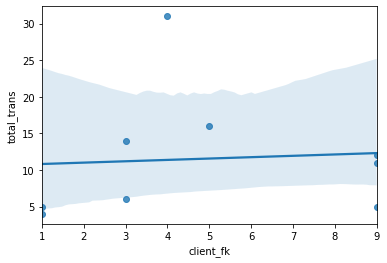

In [96]:
sns.regplot(data=trans_df, x='client_fk', y = 'total_trans')
plt.show()